# Importing Libraries

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
pd.set_option('display.max_columns', 100) # max column to be shown

In [6]:
plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Importing Data

In [27]:
file_path=r"C:\Users\Sara\Downloads\startup-expansion.xlsx"
print(os.path.exists(file_path)) 
startups=pd.read_excel(file_path)

True


In [29]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


# Pre-Proccessing

## check Null values and duplicated rows

In [32]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [34]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [36]:
startups.duplicated().sum()

0

## confirm outliers, standard deviation, Distribution of Revenue

In [48]:
startups[['Marketing Spend', 'Revenue']].describe()

,Marketing Spend,Revenue
count,150.000000,150.000000
mean,2893.146667,39301.433333
std,367.862817,15465.753977
min,1811.000000,15562.000000
25%,2662.250000,21113.500000
50%,2898.000000,42993.000000
75%,3111.500000,51145.500000
max,3984.000000,68828.000000


In [54]:
Q1 = startups['Revenue'].quantile(0.25)
Q3 = startups['Revenue'].quantile(0.75)
median = startups['Revenue'].median()
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = startups[(startups['Revenue'] < lower_bound) | (startups['Revenue'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:\n", outliers)

Lower bound: -23934.5
Upper bound: 96193.5
Outliers:
 Empty DataFrame
Columns: [Store ID, City, State, Sales Region, New Expansion, Marketing Spend, Revenue]
Index: []


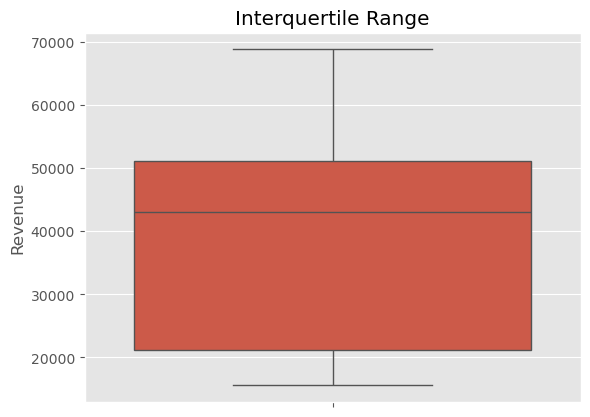

In [96]:
sns.boxplot(y=startups['Revenue'])
plt.title('Interquertile Range')
plt.show()


In [72]:
print(startups[['Marketing Spend', 'Revenue']].std())

Marketing Spend      367.862817
Revenue            15465.753977
dtype: float64


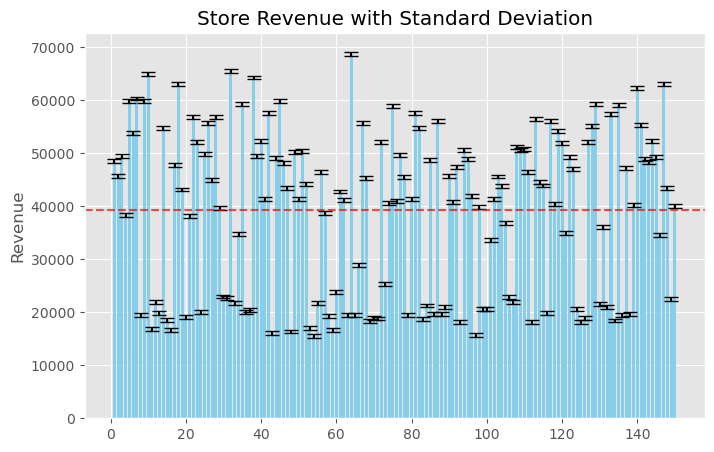

In [82]:
plt.figure(figsize=(8,5))
plt.bar(startups['Store ID'], startups['Revenue'], yerr=startups[['Marketing Spend']].std(), capsize=5, color='skyblue')
mean_revenue = startups['Revenue'].mean()
plt.axhline(y=mean_revenue, color='red', linestyle='--', alpha=0.7, label=f'Mean Revenue: ${mean_revenue:,.2f}')
plt.ylabel('Revenue')
plt.title('Store Revenue with Standard Deviation')
plt.show()

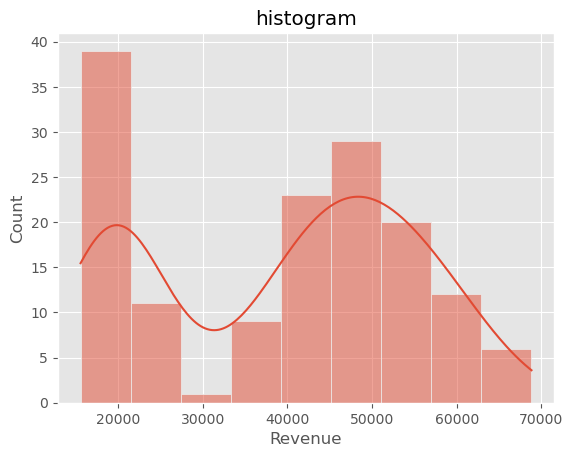

In [98]:
sns.histplot(startups['Revenue'], kde=True)
plt.title('histogram')
plt.show()

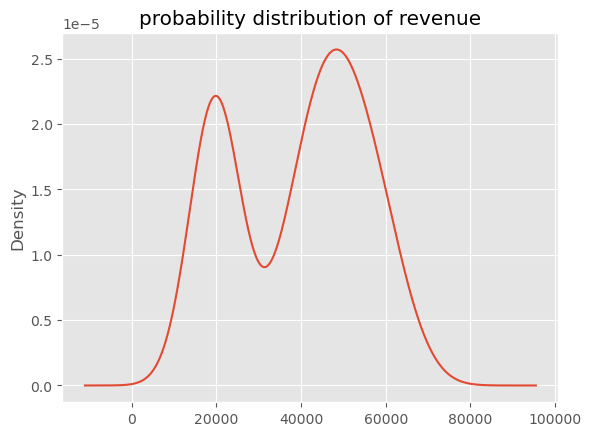

In [104]:
startups['Revenue'].plot(kind='density')
plt.title('probability distribution of revenue')
plt.show()

# Data Processing

In [110]:
#lets create new column and calculate the profit
startups['Profit']=startups['Revenue']-startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [156]:
# Calculate state-level statistics using transform() to keep all columns
startups['State_Mean_Profit'] = startups.groupby('State')['Profit'].transform('mean')
startups['State_Median_Profit'] = startups.groupby('State')['Profit'].transform('median')
startups['State_Std_Profit'] = startups.groupby('State')['Profit'].transform('std')
startups['Stores_In_State'] = startups.groupby('State')['Store ID'].transform('count')

In [144]:
# Calculate deviation from state mean
startups['Profit_Deviation_State'] = startups['Profit'] - startups['State_Mean_Profit']
startups['Pct_Deviation_State'] = (startups['Profit_Deviation_State'] / startups['State_Mean_Profit']) * 100

In [146]:
startups['Pct_Deviation_State']

0      11.727471
1      23.867963
2      17.787409
3       2.425618
4      28.165859
         ...    
145    16.431688
146    71.472449
147     9.164348
148   -43.884313
149     8.500657
Name: Pct_Deviation_State, Length: 150, dtype: float64

In [148]:
# Identify losing stores (relative to state average)
startups['Is_Losing_State'] = startups['Profit_Deviation_State'] < 0
startups['Is_Losing_State']

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148     True
149    False
Name: Is_Losing_State, Length: 150, dtype: bool

In [160]:
# Performance categories
def categorize_performance(pct_deviation):
    if pct_deviation > 25:
        return 'Excellent (+25%+)'
    elif pct_deviation > 15:
        return 'Very Good (+15:25%)'
    elif pct_deviation > 5:
        return 'Good (+5:15%)'
    elif pct_deviation > 0:
        return 'Slightly Above (0:5%)'
    elif pct_deviation > -5:
        return 'Slightly Below (0:-5%)'
    elif pct_deviation > -15:
        return 'Below Average (-5:-15%)'
    elif pct_deviation > -25:
        return 'Poor (-15:-25%)'
    else:
        return 'Very Poor (-25%+)'

startups['Performance_State'] = startups['Pct_Deviation_State'].apply(categorize_performance)

In [162]:
startups['Performance_State']

0              Good (+5:15%)
1        Very Good (+15:25%)
2        Very Good (+15:25%)
3      Slightly Above (0:5%)
4          Excellent (+25%+)
               ...          
145      Very Good (+15:25%)
146        Excellent (+25%+)
147            Good (+5:15%)
148        Very Poor (-25%+)
149            Good (+5:15%)
Name: Performance_State, Length: 150, dtype: object

In [168]:
# Summary statistics
print(f"\n🎯 Performance Summary:")
print(f"Total stores: {len(startups)}")
print(f"Stores losing money (relative to state average): {startups['Is_Losing_State'].sum()}")
print(f"Stores making money: {len(startups) - startups['Is_Losing_State'].sum()}")
print("\nPerformance Distribution:")
print(startups['Performance_State'].value_counts())


🎯 Performance Summary:
Total stores: 150
Stores losing money (relative to state average): 59
Stores making money: 91

Performance Distribution:
Performance_State
Very Poor (-25%+)          42
Excellent (+25%+)          37
Very Good (+15:25%)        20
Good (+5:15%)              17
Slightly Below (0:-5%)     16
Slightly Above (0:5%)       6
Below Average (-5:-15%)     6
Poor (-15:-25%)             6
Name: count, dtype: int64


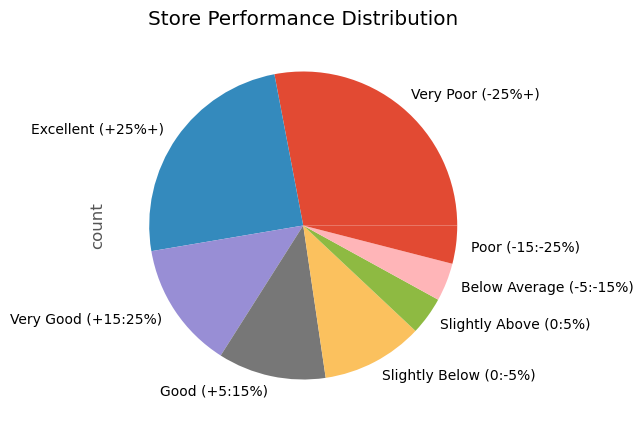

In [194]:
plt.figure(figsize=(10, 5))
performance_counts = startups['Performance_State'].value_counts()

performance_counts.plot(kind='pie', labels=performance_counts.index,color='color_pal')
plt.title('Store Performance Distribution')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'California'),
  Text(3, 0, 'Colorado'),
  Text(4, 0, 'Connecticut'),
  Text(5, 0, 'Florida'),
  Text(6, 0, 'Georgia'),
  Text(7, 0, 'Illinois'),
  Text(8, 0, 'Iowa'),
  Text(9, 0, 'Kansas'),
  Text(10, 0, 'Louisiana'),
  Text(11, 0, 'Massachusetts'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'New Jersey'),
  Text(14, 0, 'New York'),
  Text(15, 0, 'North Carolina'),
  Text(16, 0, 'Ohio'),
  Text(17, 0, 'Oregon'),
  Text(18, 0, 'South Carolina'),
  Text(19, 0, 'Tennessee'),
  Text(20, 0, 'Texas'),
  Text(21, 0, 'Utah'),
  Text(22, 0, 'Virginia'),
  Text(23, 0, 'Washington')])

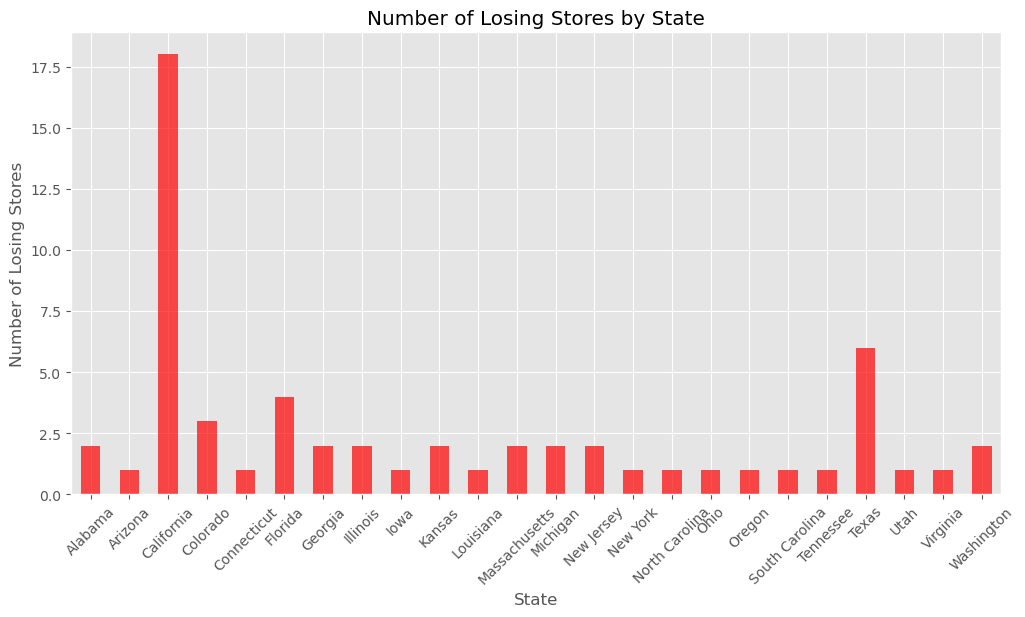

In [206]:
plt.figure(figsize=(12, 6))

# Count losing stores by state
losing_counts = startups[startups['Is_Losing_State'] == True].groupby('State').size()

# Create the bar chart
losing_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of Losing Stores by State')
plt.xlabel('State')
plt.ylabel('Number of Losing Stores')
plt.xticks(rotation=45)

In [196]:
startups(Is_Losing_State	

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,State_Mean_Profit,State_Median_Profit,State_Std_Profit,Stores_In_State,Profit_Deviation_State,Pct_Deviation_State,Is_Losing_State,Performance_State
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,41179.666667,46009.0,8394.112778,3,4829.333333,11.727471,False,Good (+5:15%)
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,34683.705882,37707.0,14798.966956,17,8278.294118,23.867963,False,Very Good (+15:25%)
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,39720.714286,41881.0,13336.261617,7,7065.285714,17.787409,False,Very Good (+15:25%)
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,34683.705882,37707.0,14798.966956,17,841.294118,2.425618,False,Slightly Above (0:5%)
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,44487.666667,38378.0,10852.701062,3,12530.333333,28.165859,False,Excellent (+25%+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,27786.250000,26096.5,11928.287007,4,4565.750000,16.431688,False,Very Good (+15:25%)
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,34683.705882,37707.0,14798.966956,17,24789.294118,71.472449,False,Excellent (+25%+)
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,37309.800000,40729.0,12782.497553,5,3419.200000,9.164348,False,Good (+5:15%)
148,149,College Station,Texas,Region 2,New,2994,22457,19463,34683.705882,37707.0,14798.966956,17,-15220.705882,-43.884313,True,Very Poor (-25%+)


In [212]:
startups.to_excel('startups-expansion_updated.xlsx')